# Dataset Description
### Overview
The data has been split into two groups:
* training set (train.csv)
* test set (test.csv)

**The training set** should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use *feature engineering* to create new features.

**The test set** should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include **gender_submission.csv**, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

Data Dictionary

| Variable |                 Definition                 |                       Key                      |
|:---------|:-------------------------------------------|:-----------------------------------------------|
| survival | Survival                                   | 0 = No, 1 = Yes                                |
| pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| sex      | Sex                                        |                                                |
| Age      | Age in years                               |                                                |
| sibsp    | # of siblings / spouses aboard the Titanic |                                                |
| parch    | # of parents / children aboard the Titanic |                                                |
| ticket   | Ticket number                              |                                                |
| fare     | Passenger fare                             |                                                |
| cabin    | Cabin number                               |                                                |
| embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

### Variable Notes
**pclass**: A proxy for socio-economic status (SES) <br>
1st = Upper <br>
2nd = Middle <br>
3rd = Lower <br>

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

source:
https://www.kaggle.com/competitions/titanic

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
train = pd.read_csv('train.csv').copy()
test = pd.read_csv('test.csv').copy()

In [129]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [130]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [131]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Parrish, Mrs. (Lutie Davis)",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [132]:
test.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Daniels, Miss. Sarah",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [133]:
# Rename columns name into lowercase
train.columns = [x.lower() for x in train.columns]

In [134]:
len(train)

891

In [135]:
# See Nan values
train.isna().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

In [137]:
# Remove unwanted columns
removeable_features = ['passengerid', 'name', 'ticket', 'cabin']
train = train.drop(labels=removeable_features, axis=1)

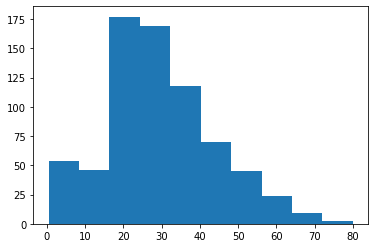

Age mean: 29.69911764705882
Age median: 28.0
Age mode: 0    24.0
dtype: float64


In [138]:
# Looking inside 'age' distribution
plt.hist(train.age)
plt.show()

print('Age mean: {}'.format(train.age.mean()))
print('Age median: {}'.format(train.age.median()))
print('Age mode: {}'.format(train.age.mode()))


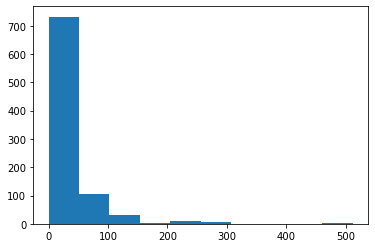

fare mean: 32.2042079685746
fare median: 14.4542
fare mode: 0    8.05
dtype: float64


In [139]:
# Looking inside 'fare' distribution
plt.hist(train.fare)
plt.show()

print('fare mean: {}'.format(train.fare.mean()))
print('fare median: {}'.format(train.fare.median()))
print('fare mode: {}'.format(train.fare.mode()))


In [146]:
# Select the columns to filter out outliers
cols_to_filter = quntitative_features

# Calculate the quartiles and interquartile range
Q1 = train[cols_to_filter].quantile(0.25)
Q3 = train[cols_to_filter].quantile(0.75)
IQR = Q3 - Q1

# Set the lower and upper thresholds
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

# Filter the train
train = train[~((train[cols_to_filter] < lower_threshold) | (train[cols_to_filter] > upper_threshold)).any(axis=1)]

In [140]:
from sklearn.impute import SimpleImputer

# Create an imputer object with median strategy
imputer = SimpleImputer(strategy='median')

# Fit the imputer object on the age column
imputer.fit(train[['age']])

# Transform the age column
train['age'] = imputer.transform(train[['age']])

# Print the updated data
print(train)

     survived  pclass     sex   age  sibsp  parch     fare embarked
0           0       3    male  22.0      1      0   7.2500        S
1           1       1  female  38.0      1      0  71.2833        C
2           1       3  female  26.0      0      0   7.9250        S
3           1       1  female  35.0      1      0  53.1000        S
4           0       3    male  35.0      0      0   8.0500        S
..        ...     ...     ...   ...    ...    ...      ...      ...
886         0       2    male  27.0      0      0  13.0000        S
887         1       1  female  19.0      0      0  30.0000        S
888         0       3  female  28.0      1      2  23.4500        S
889         1       1    male  26.0      0      0  30.0000        C
890         0       3    male  32.0      0      0   7.7500        Q

[891 rows x 8 columns]


In [141]:
train[qualitative_features]

,pclass,sex,sibsp,parch,embarked
0,3,male,1,0,S
1,1,female,1,0,C
2,3,female,0,0,S
3,1,female,1,0,S
4,3,male,0,0,S
...,...,...,...,...,...
886,2,male,0,0,S
887,1,female,0,0,S
888,3,female,1,2,S
889,1,male,0,0,C


In [142]:
train

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [143]:
# Define the columns to one-hot encode
qualitative_features = ['pclass', 'sex', 'sibsp', 'parch', 'embarked']
# Apply One-hot encode
train = pd.get_dummies(data=train, columns=qualitative_features, drop_first=True)

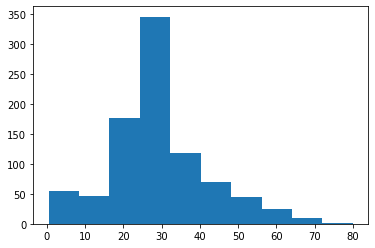

Age mean: 29.36158249158249
Age median: 28.0
Age mode: 0    28.0
dtype: float64


In [144]:
# Looking inside 'age' distribution
plt.hist(train.age)
plt.show()

print('Age mean: {}'.format(train.age.mean()))
print('Age median: {}'.format(train.age.median()))
print('Age mode: {}'.format(train.age.mode()))


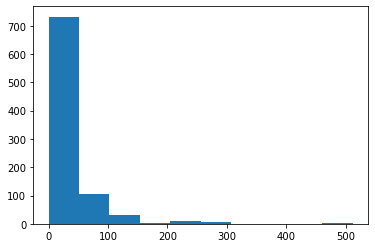

fare mean: 32.2042079685746
fare median: 14.4542
fare mode: 0    8.05
dtype: float64


In [145]:
# Looking inside 'fare' distribution
plt.hist(train.fare)
plt.show()

print('fare mean: {}'.format(train.fare.mean()))
print('fare median: {}'.format(train.fare.median()))
print('fare mode: {}'.format(train.fare.mode()))


In [147]:
from sklearn.preprocessing import StandardScaler
quntitative_features = ['age', 'fare']

# Create standardscaler instace
scaler = StandardScaler()

# Fit the instace on the selected columns
scaler.fit(train[quntitative_features])

# Transform the selected columns
train[quntitative_features] = scaler.transform(train[quntitative_features])


In [163]:
train

,survived,age,fare,pclass_2,pclass_3,sex_male,sibsp_1,sibsp_2,sibsp_3,sibsp_4,sibsp_5,sibsp_8,parch_1,parch_2,parch_3,parch_4,parch_5,parch_6,embarked_Q,embarked_S
0,0,-0.608518,-0.748128,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1,-0.209117,-0.698326,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,0.689534,2.634730,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0.689534,-0.689103,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,0,-0.009417,-0.658978,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,-0.109267,-0.323887,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
887,1,-0.908068,0.930390,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
888,0,-0.009417,0.447124,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
889,1,-0.209117,0.930390,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


,age,fare,pclass_2,pclass_3,sex_male,sibsp_1,sibsp_2,sibsp_3,sibsp_4,sibsp_5,sibsp_8,parch_1,parch_2,parch_3,parch_4,parch_5,parch_6,embarked_Q,embarked_S
0,-0.608518,-0.748128,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,-0.209117,-0.698326,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0.689534,2.634730,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0.689534,-0.689103,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,-0.009417,-0.658978,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.109267,-0.323887,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
887,-0.908068,0.930390,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
888,-0.009417,0.447124,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
889,-0.209117,0.930390,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [166]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Load the data
X, y = train.drop('survived', axis=1), train.survived

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
models = {'Logistic Regression': LogisticRegression(max_iter=1000),
          'Support Vector Machine': SVC(),
          'Random Forest': RandomForestClassifier(n_estimators=10)}

# Iterate over the models
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Predict on the test set
    y_pred = model.predict(X_test)
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    print("Model: {}".format(name))
    print("Accuracy: {:.4f}".format(accuracy))
    print("Precision: {:.4f}".format(precision))
    print("Recall: {:.4f}".format(recall))
    print()


Model: Logistic Regression
Accuracy: 0.7655
Precision: 0.7635
Recall: 0.7655

Model: Support Vector Machine
Accuracy: 0.8000
Precision: 0.7962
Recall: 0.8000

Model: Random Forest
Accuracy: 0.7586
Precision: 0.7624
Recall: 0.7586



In [167]:
y_pred

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0], dtype=int64)

In [168]:
y_test

322    1
816    0
93     0
80     0
99     0
      ..
531    0
165    1
331    0
8      1
584    0
Name: survived, Length: 145, dtype: int64

In [169]:
pd.DataFrame({'pred':y_pred, 'test':y_test})

,pred,test
322,1,1
816,1,0
93,0,0
80,0,0
99,0,0
...,...,...
531,0,0
165,0,1
331,0,0
8,1,1


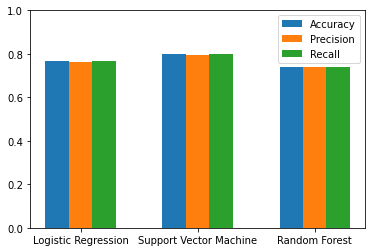

In [171]:
# Collect the evaluation metrics
accuracies = []
precisions = []
recalls = []
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Predict on the test set
    y_pred = model.predict(X_test)
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)

# Create the bar chart
bar_width = 0.2
bar_x = np.arange(len(models))

plt.bar(bar_x, accuracies, bar_width, label='Accuracy')
plt.bar(bar_x + bar_width, precisions, bar_width, label='Precision')
plt.bar(bar_x + 2*bar_width, recalls, bar_width, label='Recall')

plt.xticks(bar_x + bar_width, list(models.keys()))
plt.ylim(0, 1)
plt.legend()
plt.show()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Define the cleaning steps
cleaning_steps = [('remove_columns', 'drop',['passengerid', 'name', 'ticket', 'cabin']),
                 ('outlier_filter', 'drop',['age','fare']),
                 ('missing_values_imputer', SimpleImputer(strategy='median'))]

# Define the preprocessing steps
preprocessing_steps = [('one_hot_encoding', OneHotEncoder()),
                       ('standard_scaler', StandardScaler())]

# Combine the cleaning and preprocessing steps into a single pipeline
pipe = Pipeline([
    ('cleaning', ColumnTransformer(cleaning_steps)),
    ('preprocessing', ColumnTransformer(preprocessing_steps))
])
